In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import invgamma
import logging


In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/Jeppe/Projects/BayesFactorModel


In [14]:
from model.utils import read_clean_kv17, read_testdata1, read_testdata2,read_party_keys, matrix, vector, party_name_from_key
from model.gibbssampler import GibbsSampler
from model.distributionplotter import DistributionPlotter
from model.traceplotter import TracePlotter
from model.parameters import Parameters
from model.parameterframe import ParameterFrame

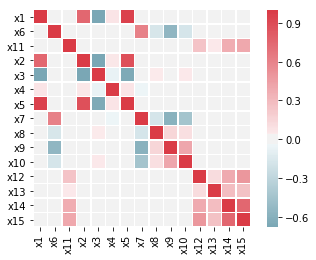

In [4]:
testdata1 = read_testdata1()
order = ['x1'] + ['x6'] + ['x11'] + ['x{}'.format(i) for i in range(2,6)] +['x{}'.format(i) for i in range(7,11)] + ['x{}'.format(i) for i in range(12,16)]
testdata1 = testdata1.reindex(columns = order)
corr_plot(testdata1)

In [5]:
data = matrix(testdata1) #making testing different data set simple

(2000, 15)


In [6]:
np.random.seed(100)

### Specifications

In [7]:
sigma_array = np.array([np.random.normal()**2 for _ in range(15)])
F = np.matrix([np.random.normal(size=3) for _ in range(2000)])
Beta = np.matrix(np.random.normal(size=(15,3)))

In [8]:
gs = GibbsSampler(n_factors=3, data=data)
gs.add('Sigma',sigma_array)
gs.add('F', F)
gs.add('Beta',Beta)

number of variables: 15  number of observations: 2000


In [9]:
gs.sampler(10000)

2018-11-12 22:15:20,315 : INFO : Sampling begins
2018-11-12 22:15:21,277 : INFO : run 0 simulations
2018-11-12 22:15:28,923 : INFO : run 10 simulations
2018-11-12 22:15:35,723 : INFO : run 20 simulations
2018-11-12 22:15:42,893 : INFO : run 30 simulations
2018-11-12 22:15:52,122 : INFO : run 40 simulations
2018-11-12 22:15:58,953 : INFO : run 50 simulations
2018-11-12 22:16:05,915 : INFO : run 60 simulations
2018-11-12 22:16:13,225 : INFO : run 70 simulations
2018-11-12 22:16:19,791 : INFO : run 80 simulations
2018-11-12 22:16:26,060 : INFO : run 90 simulations
2018-11-12 22:16:32,423 : INFO : run 100 simulations
2018-11-12 22:16:38,718 : INFO : run 110 simulations
2018-11-12 22:16:45,563 : INFO : run 120 simulations
2018-11-12 22:16:52,122 : INFO : run 130 simulations
2018-11-12 22:16:58,646 : INFO : run 140 simulations
2018-11-12 22:17:05,731 : INFO : run 150 simulations
2018-11-12 22:17:12,481 : INFO : run 160 simulations
2018-11-12 22:17:19,173 : INFO : run 170 simulations
2018-11-

2018-11-12 22:31:40,566 : INFO : run 1530 simulations
2018-11-12 22:31:46,157 : INFO : run 1540 simulations
2018-11-12 22:31:51,826 : INFO : run 1550 simulations
2018-11-12 22:31:57,441 : INFO : run 1560 simulations
2018-11-12 22:32:03,086 : INFO : run 1570 simulations
2018-11-12 22:32:08,768 : INFO : run 1580 simulations
2018-11-12 22:32:14,378 : INFO : run 1590 simulations
2018-11-12 22:32:20,052 : INFO : run 1600 simulations
2018-11-12 22:32:25,754 : INFO : run 1610 simulations
2018-11-12 22:32:31,391 : INFO : run 1620 simulations
2018-11-12 22:32:37,120 : INFO : run 1630 simulations
2018-11-12 22:32:42,818 : INFO : run 1640 simulations
2018-11-12 22:32:48,415 : INFO : run 1650 simulations
2018-11-12 22:32:54,037 : INFO : run 1660 simulations
2018-11-12 22:32:59,792 : INFO : run 1670 simulations
2018-11-12 22:33:05,572 : INFO : run 1680 simulations
2018-11-12 22:33:11,211 : INFO : run 1690 simulations
2018-11-12 22:33:16,812 : INFO : run 1700 simulations
2018-11-12 22:33:22,427 : IN

2018-11-12 23:41:21,790 : INFO : run 3050 simulations
2018-11-12 23:41:28,882 : INFO : run 3060 simulations
2018-11-12 23:41:35,475 : INFO : run 3070 simulations
2018-11-12 23:41:42,555 : INFO : run 3080 simulations
2018-11-12 23:41:49,300 : INFO : run 3090 simulations
2018-11-12 23:41:56,215 : INFO : run 3100 simulations
2018-11-12 23:42:03,132 : INFO : run 3110 simulations
2018-11-12 23:42:09,870 : INFO : run 3120 simulations
2018-11-12 23:42:16,271 : INFO : run 3130 simulations
2018-11-12 23:42:22,628 : INFO : run 3140 simulations
2018-11-12 23:42:29,345 : INFO : run 3150 simulations
2018-11-12 23:42:36,009 : INFO : run 3160 simulations
2018-11-12 23:42:42,611 : INFO : run 3170 simulations
2018-11-12 23:42:49,203 : INFO : run 3180 simulations
2018-11-12 23:42:55,527 : INFO : run 3190 simulations
2018-11-12 23:43:02,349 : INFO : run 3200 simulations
2018-11-12 23:43:09,064 : INFO : run 3210 simulations
2018-11-12 23:43:15,694 : INFO : run 3220 simulations
2018-11-12 23:43:22,057 : IN

2018-11-13 00:02:37,531 : INFO : run 4570 simulations
2018-11-13 00:02:49,391 : INFO : run 4580 simulations
2018-11-13 00:03:00,404 : INFO : run 4590 simulations
2018-11-13 00:03:09,620 : INFO : run 4600 simulations
2018-11-13 00:03:18,073 : INFO : run 4610 simulations
2018-11-13 00:03:26,117 : INFO : run 4620 simulations
2018-11-13 00:03:34,224 : INFO : run 4630 simulations
2018-11-13 00:03:42,312 : INFO : run 4640 simulations
2018-11-13 00:03:50,521 : INFO : run 4650 simulations
2018-11-13 00:03:59,885 : INFO : run 4660 simulations
2018-11-13 00:04:10,393 : INFO : run 4670 simulations
2018-11-13 00:04:21,891 : INFO : run 4680 simulations
2018-11-13 00:04:35,087 : INFO : run 4690 simulations
2018-11-13 00:04:49,727 : INFO : run 4700 simulations
2018-11-13 00:05:02,839 : INFO : run 4710 simulations
2018-11-13 00:05:14,865 : INFO : run 4720 simulations
2018-11-13 00:05:24,365 : INFO : run 4730 simulations
2018-11-13 00:05:33,321 : INFO : run 4740 simulations
2018-11-13 00:05:41,564 : IN

2018-11-13 03:32:37,126 : INFO : run 6090 simulations
2018-11-13 03:32:43,558 : INFO : run 6100 simulations
2018-11-13 03:32:49,878 : INFO : run 6110 simulations
2018-11-13 03:32:56,322 : INFO : run 6120 simulations
2018-11-13 03:33:03,053 : INFO : run 6130 simulations
2018-11-13 03:33:09,967 : INFO : run 6140 simulations
2018-11-13 03:33:16,985 : INFO : run 6150 simulations
2018-11-13 03:33:23,625 : INFO : run 6160 simulations
2018-11-13 03:33:29,990 : INFO : run 6170 simulations
2018-11-13 03:33:36,338 : INFO : run 6180 simulations
2018-11-13 03:33:42,650 : INFO : run 6190 simulations
2018-11-13 03:33:49,283 : INFO : run 6200 simulations
2018-11-13 03:33:55,663 : INFO : run 6210 simulations
2018-11-13 03:34:02,020 : INFO : run 6220 simulations
2018-11-13 03:34:08,406 : INFO : run 6230 simulations
2018-11-13 03:34:15,199 : INFO : run 6240 simulations
2018-11-13 03:34:22,015 : INFO : run 6250 simulations
2018-11-13 03:34:28,779 : INFO : run 6260 simulations
2018-11-13 03:34:35,989 : IN

2018-11-13 06:49:00,757 : INFO : run 7610 simulations
2018-11-13 06:49:07,086 : INFO : run 7620 simulations
2018-11-13 06:49:13,459 : INFO : run 7630 simulations
2018-11-13 06:49:20,440 : INFO : run 7640 simulations
2018-11-13 06:49:27,258 : INFO : run 7650 simulations
2018-11-13 06:49:33,659 : INFO : run 7660 simulations
2018-11-13 06:49:40,001 : INFO : run 7670 simulations
2018-11-13 06:49:46,352 : INFO : run 7680 simulations
2018-11-13 06:49:52,968 : INFO : run 7690 simulations
2018-11-13 06:49:59,364 : INFO : run 7700 simulations
2018-11-13 06:50:05,703 : INFO : run 7710 simulations
2018-11-13 06:50:12,049 : INFO : run 7720 simulations
2018-11-13 06:50:18,401 : INFO : run 7730 simulations
2018-11-13 06:50:25,448 : INFO : run 7740 simulations
2018-11-13 06:50:32,219 : INFO : run 7750 simulations
2018-11-13 06:50:38,838 : INFO : run 7760 simulations
2018-11-13 06:50:45,173 : INFO : run 7770 simulations
2018-11-13 06:50:51,509 : INFO : run 7780 simulations
2018-11-13 06:50:57,877 : IN

2018-11-13 07:09:01,571 : INFO : run 9130 simulations
2018-11-13 07:09:11,542 : INFO : run 9140 simulations
2018-11-13 07:09:20,605 : INFO : run 9150 simulations
2018-11-13 07:09:29,132 : INFO : run 9160 simulations
2018-11-13 07:09:37,210 : INFO : run 9170 simulations
2018-11-13 07:09:45,320 : INFO : run 9180 simulations
2018-11-13 07:09:53,669 : INFO : run 9190 simulations
2018-11-13 07:10:02,159 : INFO : run 9200 simulations
2018-11-13 07:10:11,449 : INFO : run 9210 simulations
2018-11-13 07:10:21,112 : INFO : run 9220 simulations
2018-11-13 07:10:31,378 : INFO : run 9230 simulations
2018-11-13 07:10:42,526 : INFO : run 9240 simulations
2018-11-13 07:10:53,645 : INFO : run 9250 simulations
2018-11-13 07:11:04,729 : INFO : run 9260 simulations
2018-11-13 07:11:16,405 : INFO : run 9270 simulations
2018-11-13 07:11:26,542 : INFO : run 9280 simulations
2018-11-13 07:11:35,821 : INFO : run 9290 simulations
2018-11-13 07:11:44,880 : INFO : run 9300 simulations
2018-11-13 07:11:53,582 : IN

In [15]:
beta_params = ParameterFrame(gs.Beta_list, 'beta')
beta_trace_estimation = beta_params.get_trace_df()
beta_trace_estimation.to_pickle('data//testdata1_beta_trace_df.pkl')

In [16]:
sigma_params = ParameterFrame(gs.Sigma_list, 'sigma_estimation')
sigma_trace_estimation = sigma_params.get_trace_df()
sigma_trace_estimation.to_pickle('data//testdata1_sigma_trace_df.pkl')

In [17]:
factor = ParameterFrame(gs.F_list, 'factor_estimation')
factor_trace_estimation = factor.get_trace_df()
factor_trace_estimation.to_pickle('data//testdata1_factor_trace_df.pkl')